In [40]:
# Mengunduh file dari Google Drive menggunakan ID file dengan bantuan gdown
!gdown 1tW_iNq_YEYDZhq-gHvOaP12lmqK8RqEW

Downloading...
From: https://drive.google.com/uc?id=1tW_iNq_YEYDZhq-gHvOaP12lmqK8RqEW
To: /content/Angkutan.zip
100% 18.6M/18.6M [00:00<00:00, 125MB/s]


In [41]:
# Unzip it
import zipfile  # Mengimpor modul zipfile untuk menangani file ZIP

zip_ref = zipfile.ZipFile("Angkutan.zip")  # Membuka file ZIP
zip_ref.extractall()  # Mengekstrak semua isi file ZIP ke folder saat ini
zip_ref.close()  # Menutup file ZIP setelah selesai

In [ ]:
# Fungsi untuk membagi dataset ke dalam 3 bagian: train, test, dan validation
def split_dir_to_train_test_val(directory = "Angkutan/images/",
                                train_size = 0.7,
                                test_size = 0.2,
                                val_size = 0.1):
  """
  Fungsi ini akan membuat struktur folder terpisah untuk data pelatihan, pengujian,
  dan validasi berdasarkan proporsi yang diberikan dari dataset gambar.
  """

  import os              # Mengimpor modul os untuk berinteraksi dengan sistem file
  import random          # Untuk mengacak urutan file
  import shutil          # Untuk menyalin file antar direktori

  # Membuat objek random dengan seed tetap agar hasil pengacakan selalu konsisten
  rng = random.Random(42)

  # Menelusuri direktori utama untuk mencari folder kelas (kategori)
  for root, folders, files in os.walk(directory):
    for folder in folders:  # Untuk setiap folder kategori

      list_of_files = []  # Menyimpan nama file dari kategori saat ini

      # Loop untuk menyimpan semua nama file dalam folder kategori
      for file_name in os.listdir(root + folder + "/"):
        list_of_files.append(file_name)  # Menambahkan nama file ke list

      # Mengacak urutan file untuk membagi data secara acak
      rng.shuffle(list_of_files)

      # Membagi file berdasarkan persentase (train, test, val)
      train_files = list_of_files[:int(len(list_of_files) * train_size)]
      test_files = list_of_files[int(len(list_of_files) * train_size) : int(len(list_of_files) * (train_size + test_size))]
      val_files = list_of_files[int(len(list_of_files) * (train_size + test_size)):]

      # =========================== Salin file train ===========================
      for one_file in train_files:
        dest_dir = "files/train/" + folder + "/"  # Tentukan folder tujuan
        os.makedirs(dest_dir, exist_ok=True)      # Buat folder jika belum ada
        shutil.copy2(src=(root + folder + "/" + one_file), dst=(dest_dir + one_file))  # Salin file

      # Menampilkan jumlah file yang disalin ke train
      print(f"Folder {folder}. Train data copied. {len(train_files)} files")

      # =========================== Salin file test ============================
      for one_file in test_files:
        dest_dir = "files/test/" + folder + "/"   # Folder tujuan untuk data test
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy2(src=(root + folder + "/" + one_file), dst=(dest_dir + one_file))

      print(f"Folder {folder}. Test data copied. {len(test_files)} files")

      # ========================== Salin file validation ========================
      for one_file in val_files:
        dest_dir = "files/validation/" + folder + "/"  # Folder tujuan untuk data validasi
        os.makedirs(dest_dir, exist_ok=True)
        shutil.copy2(src=(root + folder + "/" + one_file), dst=(dest_dir + one_file))

      print(f"Folder {folder}. Validation data copied. {len(val_files)} files")


# Fungsi untuk mendapatkan nama-nama kelas dari struktur folder dataset
def get_class_names_from_folder(directory):
  """
  Fungsi ini akan mengambil nama semua subfolder dari direktori yang diberikan,
  yang mewakili label kelas (misal: Mobil, Bus, Truk).
  """

  import pathlib        # Modul untuk operasi path yang lebih modern & fleksibel
  import numpy as np    # Untuk menyimpan nama kelas dalam bentuk array

  data_dir = pathlib.Path(directory)  # Ubah string path ke objek Path

  # Gunakan glob("*") untuk mengambil semua subfolder di direktori tersebut,
  # kemudian ambil hanya nama foldernya
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

  return class_names    # Kembalikan hasil array nama kelas

  # Baris ini tidak akan dijalankan karena berada setelah 'return'
  print(class_names)


In [ ]:
# Memanggil fungsi 'split_dir_to_train_test_val' untuk membagi dataset gambar
# ke dalam tiga bagian utama: train, test, dan validation. Ini adalah langkah penting
# dalam proses pelatihan model machine learning agar model dapat belajar, diuji, dan divalidasi
# dengan data yang berbeda, sehingga hasilnya lebih akurat dan generalisasi lebih baik.

split_dir_to_train_test_val(
    directory="Angkutan/images/",  # Menunjukkan lokasi direktori utama tempat semua gambar berada.
                                   # Folder ini harus berisi subfolder yang masing-masing mewakili kelas gambar
                                   # (misalnya: Mobil, Bus, Truk). Setiap subfolder berisi gambar-gambar dari kelas tersebut.

    train_size=0.7,                # Menentukan bahwa 70% dari seluruh gambar di setiap kelas akan dialokasikan
                                   # untuk data pelatihan (training set). Ini adalah bagian data yang digunakan oleh model
                                   # untuk belajar mengenali pola dan fitur penting dari gambar.

    test_size=0.2,                 # Menentukan bahwa 20% dari data akan digunakan sebagai data pengujian (test set).
                                   # Dataset ini tidak akan dilihat oleh model selama proses pelatihan,
                                   # dan digunakan untuk mengevaluasi performa akhir model secara objektif.

    val_size=0.1                   # Menentukan bahwa 10% sisanya digunakan sebagai data validasi (validation set).
                                   # Data ini digunakan saat proses pelatihan untuk mengevaluasi kinerja model secara
                                   # berkala setelah tiap epoch, sehingga kita bisa mendeteksi overfitting sedini mungkin.
)


Folder Truk. Train data copied. 37 files
Folder Truk. Test data copied. 10 files
Folder Truk. Validation data copied. 6 files
Folder Bus. Train data copied. 35 files
Folder Bus. Test data copied. 10 files
Folder Bus. Validation data copied. 6 files
Folder Trafel. Train data copied. 35 files
Folder Trafel. Test data copied. 9 files
Folder Trafel. Validation data copied. 6 files


In [ ]:
# Menggunakan fungsi bantu (helper function) 'get_class_names_from_folder'
# untuk mengambil nama-nama kelas dari direktori dataset pelatihan (train folder).
# Nama-nama kelas ini akan digunakan untuk interpretasi hasil prediksi model nantinya.

class_names = get_class_names_from_folder(directory="files/train/")
# Fungsi ini akan membaca seluruh subfolder di dalam "files/train/",
# lalu mengembalikan array yang berisi nama-nama folder tersebut.
# Setiap nama folder diasumsikan sebagai representasi dari satu kelas objek.
# Misalnya: ['Bus', 'Mobil', 'Truk']

class_names
# Menampilkan daftar nama kelas (class_names) yang telah diambil.
# Ini membantu memastikan bahwa pembagian dataset telah dilakukan dengan benar
# dan nama kelas terbaca oleh sistem seperti yang diharapkan.


array(['Bus', 'Trafel', 'Truk'], dtype='<U6')

In [ ]:
# Menghitung jumlah kelas (label) yang tersedia dalam dataset pelatihan
# Variabel class_names adalah array yang berisi nama-nama kelas yang diambil dari subfolder "files/train/"
# Fungsi len() digunakan untuk mengetahui jumlah total kelas yang akan dipelajari oleh model
len(class_names)


3

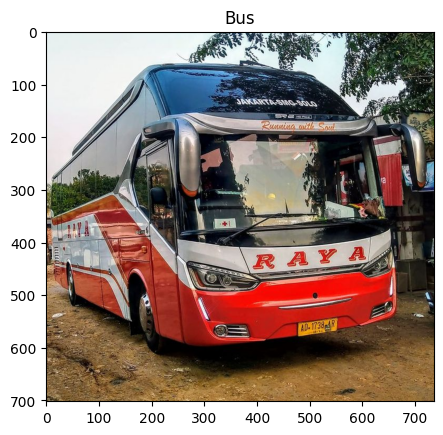

In [ ]:
# Import library untuk visualisasi dan pengambilan gambar
import matplotlib.pyplot as plt              # Untuk menampilkan gambar dalam bentuk grafik
import matplotlib.image as mpimg             # Untuk membaca gambar sebagai array

import os                                    # Untuk interaksi dengan sistem file (misalnya membaca isi folder)
import random                                # Untuk memilih gambar secara acak

# Fungsi untuk menampilkan satu gambar acak dari suatu kelas dalam direktori tertentu
def visualize_random_image(target_dir, target_class):
  """
  Fungsi ini akan mengambil satu gambar acak dari kelas tertentu (target_class)
  yang berada di dalam direktori target_dir, lalu menampilkannya dengan judul kelas tersebut.
  """

  image_dir = target_dir + target_class       # Menggabungkan path direktori dan nama kelas (misalnya: "files/test/Bus")

  random_image = random.sample(os.listdir(image_dir), 1)
  # Mengambil satu nama file gambar secara acak dari folder kelas tersebut

  img = mpimg.imread(image_dir + "/" + random_image[0])
  # Membaca gambar yang dipilih secara acak dan mengubahnya menjadi array piksel

  plt.imshow(img)                             # Menampilkan gambar menggunakan matplotlib
  plt.title(target_class)                     # Menambahkan judul di atas gambar sesuai nama kelas

# Memanggil fungsi untuk menampilkan satu gambar acak dari kelas "Bus" di direktori "files/test/"
visualize_random_image("files/test/", "Bus")


In [42]:
# Import library TensorFlow untuk membangun dan melatih model deep learning
import tensorflow as tf

# Import ImageDataGenerator dari Keras, yang digunakan untuk memproses dan memuat gambar dari direktori
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Membuat objek ImageDataGenerator untuk masing-masing data (train, test, validation)
# Fungsi rescale=1/255. digunakan untuk menormalkan nilai piksel gambar dari 0-255 menjadi 0-1
train_datagen = ImageDataGenerator(rescale=1/255.)      # Untuk data pelatihan
test_datagen = ImageDataGenerator(rescale=1/255.)       # Untuk data pengujian
val_datagen = ImageDataGenerator(rescale=1/255.)        # Untuk data validasi

# Membuat generator untuk memuat data pelatihan dari direktori "files/train"
# - target_size: ukuran gambar diubah menjadi 240x240 piksel
# - batch_size: jumlah gambar yang diproses sekaligus dalam satu batch
# - class_mode="categorical": label dikonversi ke bentuk one-hot (misalnya: [1,0,0])
train_data = train_datagen.flow_from_directory(
    directory="files/train",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)

# Membuat generator untuk memuat data pengujian dari direktori "files/test"
test_data = test_datagen.flow_from_directory(
    directory="files/test",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)

# Membuat generator untuk memuat data validasi dari direktori "files/validation"
validation_data = val_datagen.flow_from_directory(
    directory="files/validation",
    target_size=(240, 240),
    batch_size=32,
    class_mode="categorical"
)


Found 107 images belonging to 3 classes.
Found 29 images belonging to 3 classes.
Found 18 images belonging to 3 classes.


In [ ]:
# Mengatur seed untuk hasil yang dapat direproduksi
tf.random.set_seed(42)  # Dengan seed yang sama, hasil pelatihan akan konsisten setiap kali dijalankan

# Import komponen untuk membangun model deep learning
from tensorflow.keras.models import Sequential                    # Untuk membuat model berurutan (layer demi layer)
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D  # Layer-layer dasar CNN
from tensorflow.keras.optimizers import Adam                      # Optimizer untuk mengatur pembaruan bobot saat training

# Membuat model Sequential (model berlapis-lapis secara linear)
model = Sequential([
    # Layer konvolusi pertama: 10 filter, ukuran kernel 3x3, fungsi aktivasi ReLU
    Conv2D(10, 3, activation="relu", input_shape=(240, 240, 3)),

    # Layer pooling pertama: Mengurangi ukuran fitur map dengan pool size 2x2
    MaxPool2D(pool_size=2),

    # Layer konvolusi kedua: 10 filter, kernel 3x3, ReLU
    Conv2D(10, 3, activation="relu"),

    # Layer pooling kedua: Mengurangi ukuran lagi
    MaxPool2D(pool_size=2),

    # Layer flatten: Mengubah hasil 2D dari CNN menjadi 1D sebelum masuk ke layer dense
    Flatten(),

    # Layer output: 3 neuron (karena klasifikasi 3 kelas), fungsi aktivasi softmax untuk probabilitas
    Dense(3, activation="softmax")
])

# Menyusun (compile) model agar siap untuk dilatih
model.compile(
    loss="categorical_crossentropy",   # Fungsi loss untuk klasifikasi multi-kelas dengan one-hot encoded label
    optimizer=Adam(),                  # Optimizer Adam (populer untuk training neural network)
    metrics=["accuracy"]              # Metrik yang digunakan untuk evaluasi performa model
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Melatih (fit) model dengan data pelatihan dan validasi
history = model.fit(
    train_data,                  # Data pelatihan (gambar + label dari folder 'files/train')
    batch_size=32,               # Jumlah data per batch (opsional di sini karena sudah ditentukan di generator)
    epochs=10,                   # Jumlah iterasi penuh ke seluruh dataset
    steps_per_epoch=len(train_data),  # Langkah per epoch = jumlah batch per epoch
    validation_data=validation_data,  # Data validasi untuk mengevaluasi performa model di setiap epoch
    validation_steps=len(validation_data)  # Langkah per epoch validasi = jumlah batch validasi
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.6111 - val_loss: 1.6577
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 939ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6111 - val_loss: 1.6786
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 0.6111 - val_loss: 1.7167
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.6111 - val_loss: 1.7431
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 884ms/step - accuracy: 1.0000 - loss: 9.8609e-04 - val_accuracy: 0.6111 - val_loss: 1.7444
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 825ms/step - accuracy: 1.0000 - loss: 9.6381e-04 - val_accuracy: 0.6111 - val_loss: 1.7386
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 1.0000 - loss: 8.6060e-04 - val_accuracy: 0.6111 - val_loss: 1.7552
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 944ms/step - accuracy: 1.0000 - loss: 9.2734e-04 - val_accuracy: 0.6111 - val_l

In [ ]:
# Mengevaluasi performa model pada data uji (test set)
# Fungsi evaluate() akan menghitung nilai loss dan akurasi berdasarkan data yang belum pernah dilihat model sebelumnya
# Parameter test_data adalah data uji yang telah diproses oleh ImageDataGenerator dan berisi gambar serta label
# Hasil evaluasi berupa dua nilai: [loss, accuracy]
# - Loss menunjukkan seberapa besar kesalahan prediksi model
# - Accuracy menunjukkan persentase prediksi yang benar
model.evaluate(test_data)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step - accuracy: 0.5862 - loss: 1.0526


[1.0525634288787842, 0.5862069129943848]

<Axes: >

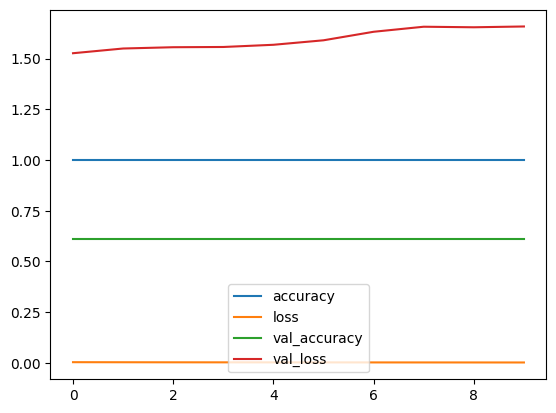

In [ ]:
# Mengimpor pustaka pandas dengan alias 'pd'
# Pandas digunakan untuk memanipulasi dan menganalisis data dalam bentuk tabel (DataFrame)
import pandas as pd

# Mengubah objek history.history (dictionary berisi data akurasi dan loss per epoch) menjadi DataFrame
# Kemudian memanggil fungsi plot() untuk menampilkan grafik dari data tersebut
# Grafik ini akan menunjukkan tren nilai loss dan accuracy selama proses pelatihan
# Biasanya akan muncul 4 garis: loss, val_loss, accuracy, dan val_accuracy
pd.DataFrame(history.history).plot()


--2025-05-29 21:40:57--  https://i.pinimg.com/736x/8d/28/74/8d2874ead609b146c25b0b4f08c7b1e0.jpg
Resolving i.pinimg.com (i.pinimg.com)... 23.45.180.208, 23.45.180.234, 2600:1408:c400:27::17da:da89, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.45.180.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15483 (15K) [image/jpeg]
Saving to: ‘8d2874ead609b146c25b0b4f08c7b1e0.jpg’

8d2874ead609b146c25 100%[===================>]  15.12K  --.-KB/s    in 0.001s  

2025-05-29 21:40:58 (10.9 MB/s) - ‘8d2874ead609b146c25b0b4f08c7b1e0.jpg’ saved [15483/15483]



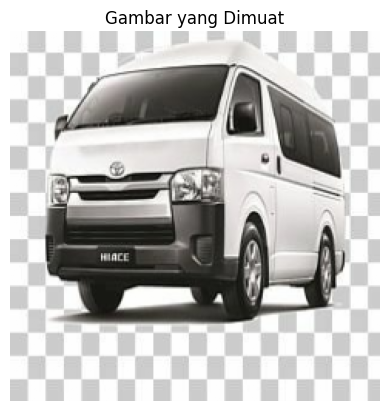

In [60]:
# Mengunduh gambar dari internet menggunakan perintah wget
# Gambar ini nantinya akan digunakan untuk menguji model yang sudah dilatih
!wget https://i.pinimg.com/736x/8d/28/74/8d2874ead609b146c25b0b4f08c7b1e0.jpg
# Fungsi untuk memuat dan mengubah ukuran gambar
def load_and_resize_image(filename, size):

  # Membaca file gambar dari disk menjadi tensor (format data TensorFlow)
  img = tf.io.read_file(filename)

  # Mendekode (mengubah) data gambar dari file ke format gambar tensor
  img = tf.image.decode_image(img)

  # Mengubah ukuran gambar menjadi dimensi (size x size), dalam hal ini 240x240 piksel
  img = tf.image.resize(img, [size, size])

  # Menormalisasi nilai piksel dari 0–255 menjadi 0–1 agar sesuai dengan model yang telah dilatih
  img = img / 255

  # Mengembalikan gambar hasil pemrosesan
  return img

# Memanggil fungsi untuk memuat dan mengubah ukuran gambar yang baru saja diunduh
image = load_and_resize_image("8d2874ead609b146c25b0b4f08c7b1e0.jpg", 240)

# Menampilkan gambar hasil pemrosesan menggunakan matplotlib
plt.imshow(image)        # Menampilkan gambar
plt.axis("off")          # Menghilangkan sumbu x dan y agar tampilan lebih bersih
plt.title("Gambar yang Dimuat")  # Memberi judul pada gambar
plt.show()               # Menampilkan gambar di jendela output


In [61]:
# Melakukan prediksi pada gambar menggunakan model
# - tf.expand_dims(image, axis=0): menambahkan dimensi batch pada gambar,
#   karena model biasanya mengharapkan input dengan bentuk (batch_size, height, width, channels)
#   jadi dari bentuk (height, width, channels) menjadi (1, height, width, channels)
# - model.predict(): melakukan prediksi berdasarkan input yang diberikan
pred = model.predict(tf.expand_dims(image, axis=0))

# Menampilkan hasil prediksi
pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


array([[0.28119746, 0.6537564 , 0.06504618]], dtype=float32)

In [62]:
# Mengambil label kelas dari hasil prediksi
# - pred[0]: mengambil array prediksi untuk gambar pertama (karena hanya satu gambar yang diprediksi, batch size = 1)
# - argmax(): mengambil indeks dengan nilai probabilitas tertinggi, yang menunjukkan kelas yang diprediksi
# - class_names[]: daftar nama-nama kelas yang digunakan untuk mengonversi indeks menjadi nama kelas
class_names[pred[0].argmax()]


np.str_('Trafel')